<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Need)</span></div>

# What to expect in this chapter

_Essentially using the `matplotlib` package to learn how to use basic commands to create, edit and modify plots_

# 1 A simple plot

## 1.1 Let’s look at some code.

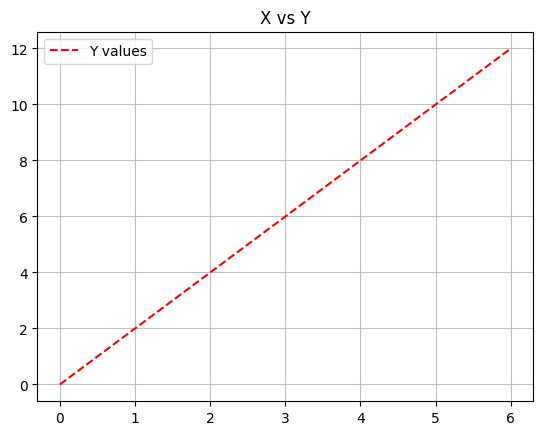

In [1]:
from matplotlib import pyplot as plt 
x=[0,1,2,3,4,5,6]
y_1=[0,2,4,6,8,10,12]  
y_2=[0,3,6,9,12,15,18]

plt.plot(x, y_1, label='Y values', color='red', linestyle='dashed') #base structure for the dashed line plot
plt.xlabel=('x-values') #name of x-axis
plt.ylabel=('y-values') #name of y-axis
plt.title('X vs Y') #name of main plot
plt.grid(alpha=.8) #depth of the background grid
plt.legend(loc='upper left') #location of the legend

### Things to note

|Long form|Abbreviation|
|:--:|:--:|
|`color`|`c`|
|`linestyle`|`ls`|
|`linewidth`|`lw`|

1. Jupyter being an interactive environment, allows us to see a valid output, even without us using the function `plt.show()` - however, it is better to include this function, so that the code will run in non-interactive environments (Such as directly from the terminal). 
2. Styling parameters such as `color`, `linewidth`, `linestyle` do not always have to specified. Even if they are specified, their order does not matter. 
3. Splitting the argument values into separate lines improves readability. 

## 1.2 Adding another plot

Essentially just add another `plt.plot()` function with the necessary arguments to the code, to add another plot-line to the existing graph. 

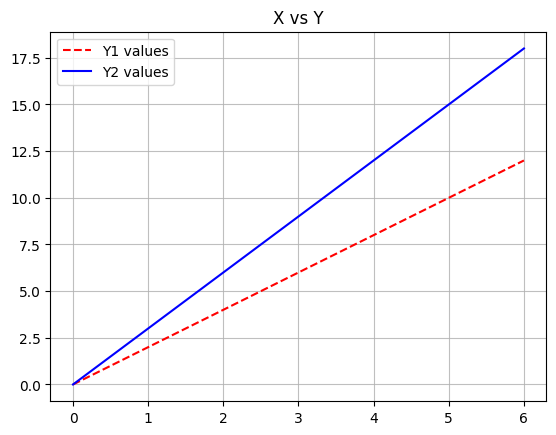

In [2]:
from matplotlib import pyplot as plt 
x=[0,1,2,3,4,5,6]
y_1=[0,2,4,6,8,10,12]  
y_2=[0,3,6,9,12,15,18]

plt.plot(x, y_1, label='Y1 values', color='red', linestyle='dashed') #base structure for the dashed line plot
plt.plot(x, y_2, label='Y2 values', color='blue')
plt.xlabel=('x-values') #name of x-axis
plt.ylabel=('y-values') #name of y-axis
plt.title('X vs Y') #name of main plot
plt.grid(alpha=.8) #depth of the background grid
plt.legend(loc='upper left') #location of the legend

##### A short note
Two (or more) lines can be plotted using the same `plt.plot()` function, but naming and differentiating between the datasets can become a hassle. 

## 1.3 Yet another plot but with error bars

Here we use the `plt.errorbar()` function with the necessary arguments in order to plot the function. 

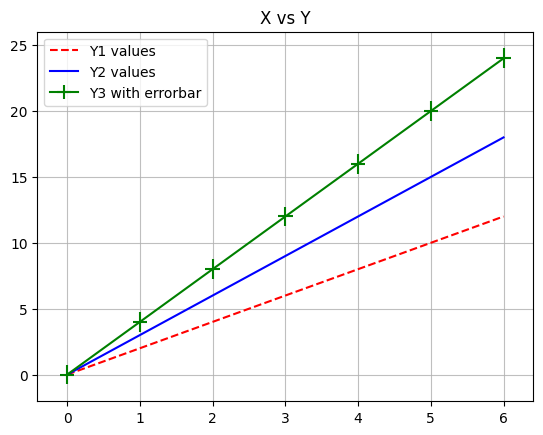

In [3]:
from matplotlib import pyplot as plt 
x=[0,1,2,3,4,5,6]
y_1=[0,2,4,6,8,10,12]  
y_2=[0,3,6,9,12,15,18]
y_3=[0,4,8,12,16,20,24]
x_error=0.1 #error on x-axis values
y_error=0.75 #error on y-axis values

plt.plot(x, y_1, label='Y1 values', color='red', linestyle='dashed') #base structure for the dashed line plot
plt.plot(x, y_2, label='Y2 values', color='blue')
plt.errorbar(x, y_3, xerr=x_error, yerr=y_error, color='green', label='Y3 with errorbar') #base structure for a solid line plot with error bars
plt.xlabel=('x-values') #name of x-axis
plt.ylabel=('y-values') #name of y-axis
plt.title('X vs Y') #name of main plot
plt.grid(alpha=.8) #depth of the background grid
plt.legend(loc='upper left') #location of the legend

# 2 Better with NumPy

_better because of the numerous mathematical functions that can be used with NumPy arrays - hence making our graphs better for scientific purposes_

## 2.1 Adding mathematical functions

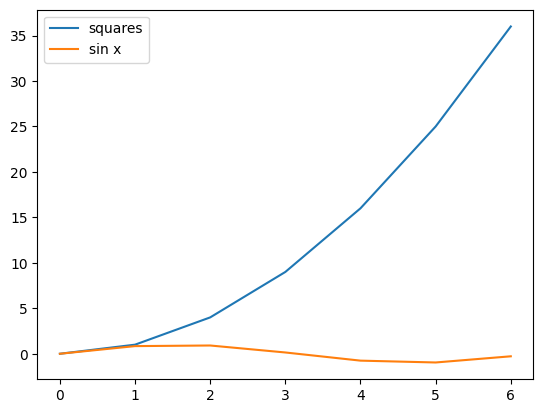

In [4]:
from matplotlib import pyplot as plt
import numpy as np
x=np.array([num for num in range(7)])
x2=x**2
sin_x=np.sin(x)
plt.plot(x, x2, label='squares')
plt.plot(x, sin_x, label='sin x')
plt.legend()

_The graph doesn't look like anything because of the lack of the negative y-axis to show the periodicity of the sin curve_

## We need another axis!

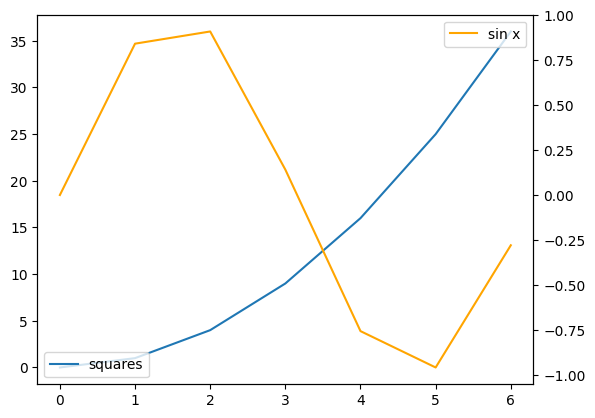

In [5]:
from matplotlib import pyplot as plt
import numpy as np

x=np.array([num for num in range(7)])
x2=x**2
sin_x=np.sin(x)

plt.plot(x, x2, label='squares')
plt.legend(loc='lower left')

plt.twinx()

plt.plot(x, sin_x, label='sin x', color='orange')
plt.legend()

_The sin curve looks wonky because of the discrete y-values - similar to us trying to connect distinc y-values during hand-drawing graphs using graph paper_

This can be changed by using the `np.linspace()` function to increase the intensity of y-values - thus giving the interpreter enough y-values to make the curve continuous. 

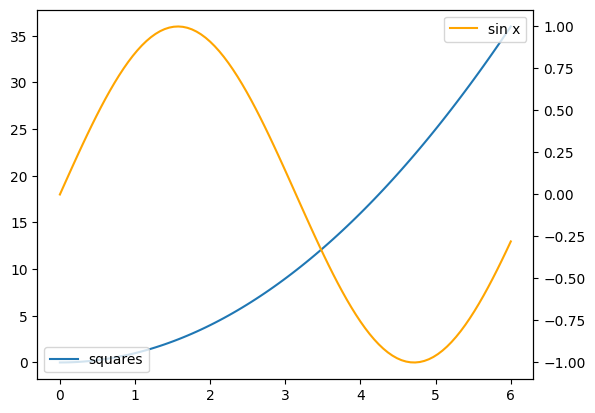

In [6]:
from matplotlib import pyplot as plt
import numpy as np

x=np.array([num for num in range(7)])
x=np.linspace(0, 6, 100) #function to make it continuous
x2=x**2
sin_x=np.sin(x)

plt.plot(x, x2, label='squares')
plt.legend(loc='lower left')

plt.twinx()

plt.plot(x, sin_x, label='sin x', color='orange')
plt.legend()

# 3 Saving to disc

After writing our code for the plot, we can use the pre-built function from `matplotlib` - `plt.savefig('filename.extension, dpi=300)`. 

1. The resolution of the graph can be increased by increasing the value of the `dpi` value in the argument `plt.savefig()` function. 
2. Unless specified, the file (`filename.extension`) will be saved in the current working directory - i.e. the folder in which the current notebook is saved.

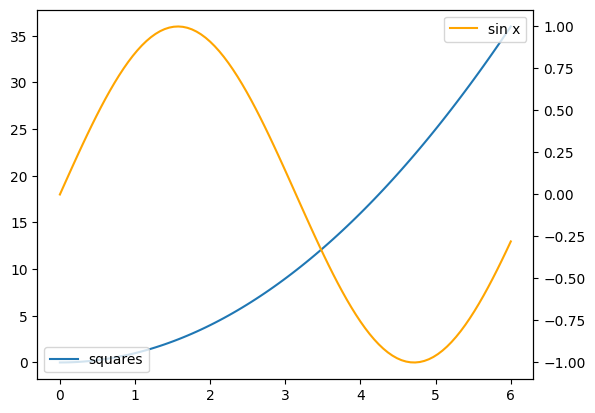

In [7]:
from matplotlib import pyplot as plt
import numpy as np

x=np.array([num for num in range(7)])
x=np.linspace(0, 6, 100) #function to make it continuous
x2=x**2
sin_x=np.sin(x)

plt.plot(x, x2, label='squares')
plt.legend(loc='lower left')

plt.twinx()

plt.plot(x, sin_x, label='sin x', color='orange')
plt.legend()

plt.savefig('plot1.png', dpi=300)

Here is proof of the newly created plot being saved in the current working directory!

![](proofofsaving.png)

# 4 A real example: Global Warming

## 4.1 Plotting data from files

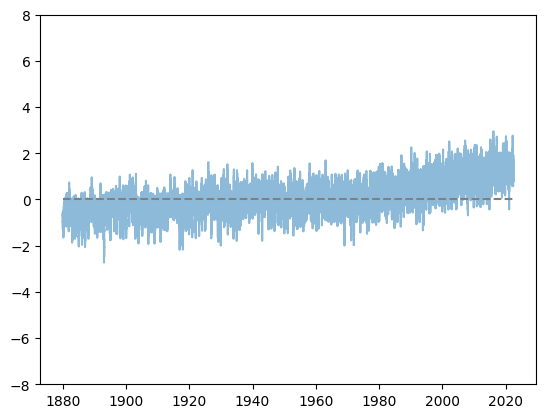

In [8]:
import numpy as np
from matplotlib import pyplot as plt
data=np.loadtxt('Complete_TAVG_daily.txt', skiprows=24)
date=data[:,0] #splicing column 1 to obtain the years
anomaly=data[:,-1] #splicing the last columb to obtain the anomalous temperatures in each year
plt.plot(date, anomaly, alpha=0.5) #using a small alpha value to soften the colour of the plot
plt.ylim([-8,8]) #creating a symmetrical y-axis
plt.hlines(0, date[0], date[-1], linestyle='--', colors='grey') #the first arg is the y-value, while the next two args are the start and end x-values

## 4.2 Styles

The `matplotlib` module offers standard plot templates to create good-looking graphs without having to format every axis and detail separately. Here we use the function `plt.style.use('name_of_style')`. 

This syntax must be included at the beginning of the code chunk. 

Given below is an example. 

Text(0.5, 1.0, 'Temperature anomaly\n(Relative to avg from Estimated Jan 1951-Dec 1980)')

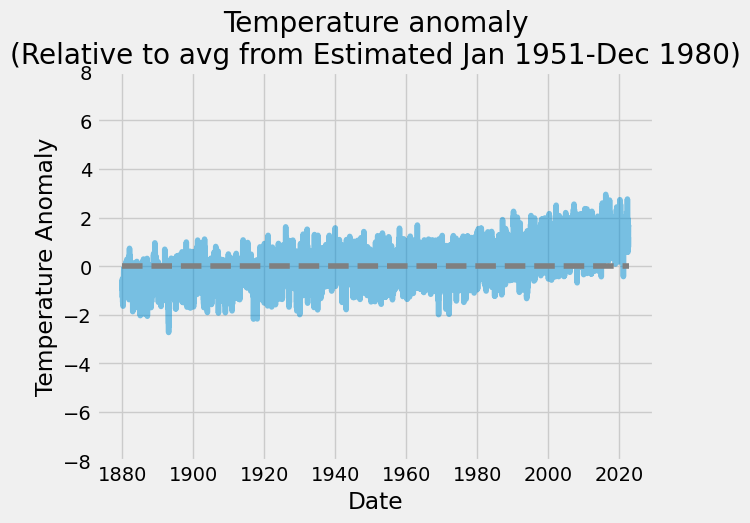

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
data=np.loadtxt('Complete_TAVG_daily.txt', skiprows=24)
date=data[:,0] #splicing column 1 to obtain the years
anomaly=data[:,-1] #splicing the last columb to obtain the anomalous temperatures in each year
plt.plot(date, anomaly, alpha=0.5) #using a small alpha value to soften the colour of the plot
plt.ylim([-8,8]) #creating a symmetrical y-axis
plt.hlines(0, date[0], date[-1], linestyle='--', colors='grey') #the first arg is the y-value, while the next two args are the start and end x-values
plt.xlabel("Date")
plt.ylabel("Temperature Anomaly")
plt.title("Temperature anomaly\n(Relative to avg from Estimated Jan 1951-Dec 1980)")

### xkcd!

_apparently something with a nerdy sense of humour_

Text(0.5, 1.0, 'Temperature anomaly\n(Relative to avg from Estimated Jan 1951-Dec 1980)')

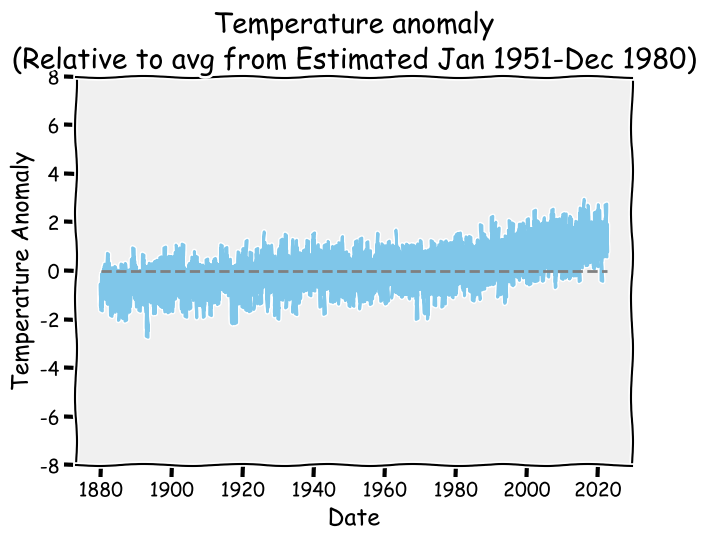

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import logging
logging.getLogger('matplotlib.font_manager').disabled=True
plt.xkcd()
data=np.loadtxt('Complete_TAVG_daily.txt', skiprows=24)
date=data[:,0] #splicing column 1 to obtain the years
anomaly=data[:,-1] #splicing the last columb to obtain the anomalous temperatures in each year
plt.plot(date, anomaly, alpha=0.5) #using a small alpha value to soften the colour of the plot
plt.ylim([-8,8]) #creating a symmetrical y-axis
plt.hlines(0, date[0], date[-1], linestyle='--', colors='grey') #the first arg is the y-value, while the next two args are the start and end x-values
plt.xlabel("Date")
plt.ylabel("Temperature Anomaly")
plt.title("Temperature anomaly\n(Relative to avg from Estimated Jan 1951-Dec 1980)")

### Resetting styles

We can get the original plot back using the following command: `pyplot.style.use('default')`